# <a href="#C1">Hunger Study - Global and national impact

###  **Description** : 
Conduct a large-scale study on the theme of malnutrition worldwide using data from the Food and Agriculture Organization of the United Nations (FAO). The data is distributed in 4 CSV files:
- Undernourishment
- Population between 2013-2018
- Food aid
- Food availability for the year 2013

### **Objective, analyze the 4 files to answer the following questions:**
#### I) Data Glossary :
- a) Establish the link between the 10 variables expressed in thousands of tons on the uses of domestic availability.
- b) How are cereals used for human vs. animal consumption ?
- c) Cassava (manioc) in Thailand: how is it used and distributed, particularly in terms of exports and production?

#### II) Insights related to 2017 :

- a) Proportion of undernourished people - 2017
- b) Theoretical number of people who could be fed.
- c)The same of question II.b) for the availability of plant products.
- d) The portion allocated to animal feed,
 - la part qui est attribuée à l’alimentation animale,
 - The portion lost,
 - The portion actually used for human consumption.
 
 
 #### III) Global food situation: worst-hit countries and aid measures since 2013 :
 - a) Countries with the highest proportion of undernourished people in 2017.
 - b) Countries that have received the most aid since 2013. 
 - c) Countries with the highest/lowest food availability per capita
 - d) Other useful insights to highlight countries that appear to be facing the most difficulties in terms of food.
 
 ### IV) Geospatial mapping
 
 ### The main steps followed to conduct the analysis:
- Data collection
- Data cleaning
- File merging
- Data analysis

## Collect data

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import 4 CSV files
data_sn = pd.read_csv('sous_nutrition.csv', sep=',')
data_pop = pd.read_csv('population.csv', sep=',')
data_aa = pd.read_csv('aide_alimentaire.csv')
data_dispo = pd.read_csv('dispo_alimentaire.csv')

## Data cleaning

We need to harmonize the column names in our files in order to better manage future joins and measurement units.
- The column "Pays bénéficiaire" in the food aid file will be renamed to "Zone".
- The column "Valeur" in the food aid file will be renamed to "Value_fa_kg".
- The column "Valeur" in the undernutrition file will be renamed to "Value_un".
- The column "Valeur" in the population file will be renamed to "Value_pop".
#### Units :
- The Values in the undernutrition file are expressed in millions of people, let's convert them to number of people.
- The Values in the population file are expressed in thousands of people, let's convert them to number of people.
- The Values in the food aid file are expressed in tons, let's convert them to kg (kilogramms).

In [3]:
# Rename columns
data_sn.rename(columns={"Valeur": "Valeur_sn"}, inplace=True)
data_pop.rename(columns={"Valeur": "Valeur_pop"}, inplace=True)
data_aa.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)
data_aa.rename(columns={"Valeur": "Valeur_aa_kg"}, inplace=True)

### Type de données

In [4]:
data_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Zone       1218 non-null   object
 1   Année      1218 non-null   object
 2   Valeur_sn  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


- Le type de données pour les colonnes Année et Valeur doit être changé ainsi que le format de Année.
- 594 valeurs manquantes

In [5]:
# Change year format to yyyy
modif_annee_sn = {'2012-2014':2013, '2013-2015':2014, '2014-2016':2015, '2015-2017':2016, '2016-2018':2017, '2017-2019':2018}
data_sn["Année"].replace(modif_annee_sn, inplace=True)
# Change type of Year column
data_sn["Année"] = data_sn["Année"].astype(int)
# Delete "<" symbol
data_sn.loc[data_sn["Valeur_sn"] == "<0.1", "Valeur_sn"] = 0
# Value column type modification.
data_sn["Valeur_sn"] = data_sn["Valeur_sn"].astype(float)
# Check
data_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zone       1218 non-null   object 
 1   Année      1218 non-null   int32  
 2   Valeur_sn  624 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 23.9+ KB


In [6]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        1416 non-null   object 
 1   Année       1416 non-null   int64  
 2   Valeur_pop  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [7]:
data_aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Zone          1475 non-null   object
 1   Année         1475 non-null   int64 
 2   Produit       1475 non-null   object
 3   Valeur_aa_kg  1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [8]:
# Modify units
data_sn["Valeur_sn"] = data_sn["Valeur_sn"]*10**6
data_pop["Valeur_pop"] = data_pop["Valeur_pop"]*10**3
data_aa["Valeur_aa_kg"] = data_aa["Valeur_aa_kg"]*1000

# Undernourishment file

In [9]:
# Count NaNs per country in the Year column.
df = data_sn[data_sn["Valeur_sn"].isnull()].groupby("Zone").count().sort_values("Année")
df

,Année,Valeur_sn
Zone,,
Argentine,1,0
Ukraine,3,0
Tunisie,4,0
Samoa,5,0
Kazakhstan,5,0
...,...,...
Fédération de Russie,6,0
France,6,0
Finlande,6,0


We can see that we have countries where the Year column is empty for all years between 2013 and 2017 ("Année" = 6) and others where values are missing between 1 and 5 times. We will replace by :
- by their respective medians for countries with between 1 and 3 missing values (NaN)
- by 0 for all other countries

In [10]:
# List of countries not affected by the 0 replacement 
liste = {"Argentine", "Ukraine"}
data_sn[data_sn["Zone"].isin(liste)]

,Zone,Année,Valeur_sn
54,Argentine,2013,1200000.0
55,Argentine,2014,NaN
56,Argentine,2015,1100000.0
57,Argentine,2016,1300000.0
58,Argentine,2017,1500000.0
59,Argentine,2018,1700000.0
1170,Ukraine,2013,NaN
1171,Ukraine,2014,NaN
1172,Ukraine,2015,1300000.0
1173,Ukraine,2016,NaN


In [11]:
# Replace NaN with 0 for all countries not included in "liste"
mask = ~data_sn["Zone"].isin(liste)
data_sn.loc[mask, "Valeur_sn"] = data_sn.loc[mask, "Valeur_sn"].fillna(0)

# Replace the NaN of countries in the list except Samoa by their respective medians
medianes = {"Argentine": data_sn.loc[data_sn["Zone"] == "Argentine", "Valeur_sn"].median(),
            "Ukraine": data_sn.loc[data_sn["Zone"] == "Ukraine", "Valeur_sn"].median()}

for pays, median in medianes.items():       # items() is used to extract key-value pairs from a dict
    data_sn.loc[(data_sn["Zone"] == pays) & (data_sn["Valeur_sn"].isnull()), "Valeur_sn"] = median
    
# Check
data_sn[data_sn["Zone"].isin(liste)]

,Zone,Année,Valeur_sn
54,Argentine,2013,1200000.0
55,Argentine,2014,1300000.0
56,Argentine,2015,1100000.0
57,Argentine,2016,1300000.0
58,Argentine,2017,1500000.0
59,Argentine,2018,1700000.0
1170,Ukraine,2013,1500000.0
1171,Ukraine,2014,1500000.0
1172,Ukraine,2015,1300000.0
1173,Ukraine,2016,1500000.0


In [12]:
data_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zone       1218 non-null   object 
 1   Année      1218 non-null   int32  
 2   Valeur_sn  1218 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 23.9+ KB


Toutes les valeurs manquantes du fichier sous-nutrition ont été traité.

In [13]:
# Search for the different designations of CHINA 
data_sn.loc[data_sn["Zone"].str.contains("Chine", na=False)]

,Zone,Année,Valeur_sn
222,Chine - RAS de Hong-Kong,2013,0.0
223,Chine - RAS de Hong-Kong,2014,0.0
224,Chine - RAS de Hong-Kong,2015,0.0
225,Chine - RAS de Hong-Kong,2016,0.0
226,Chine - RAS de Hong-Kong,2017,0.0
227,Chine - RAS de Hong-Kong,2018,0.0
228,Chine - RAS de Macao,2013,0.0
229,Chine - RAS de Macao,2014,0.0
230,Chine - RAS de Macao,2015,0.0
231,Chine - RAS de Macao,2016,0.0


In [14]:
# Delet"," in country designations CHINA 
modif_chine_sn = {"Chine, continentale":"Chine continentale", "Chine, Taiwan Province de" : "Taïwan - province de Chine"}
data_sn["Zone"].replace(modif_chine_sn, inplace=True)
# Check
data_sn.loc[data_sn["Zone"].str.contains("Chine", na=False)]

,Zone,Année,Valeur_sn
222,Chine - RAS de Hong-Kong,2013,0.0
223,Chine - RAS de Hong-Kong,2014,0.0
224,Chine - RAS de Hong-Kong,2015,0.0
225,Chine - RAS de Hong-Kong,2016,0.0
226,Chine - RAS de Hong-Kong,2017,0.0
227,Chine - RAS de Hong-Kong,2018,0.0
228,Chine - RAS de Macao,2013,0.0
229,Chine - RAS de Macao,2014,0.0
230,Chine - RAS de Macao,2015,0.0
231,Chine - RAS de Macao,2016,0.0


# Population file

In [15]:
data_pop.head()

,Zone,Année,Valeur_pop
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [16]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        1416 non-null   object 
 1   Année       1416 non-null   int64  
 2   Valeur_pop  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [17]:
# The maximum population of 1,427,648,000 must refer to CHINA...
data_pop[data_pop["Valeur_pop"] == data_pop["Valeur_pop"].max()]

,Zone,Année,Valeur_pop
263,"Chine, continentale",2018,1.427648e+09


In [18]:
# Search for the different designations of CHINA 
data_pop.loc[data_pop["Zone"].str.contains('Chine', na=False)]
# Delet"," in country designations CHINA 
modif_chine_pop = {"Chine, continentale":"Chine continentale", "Chine, Taiwan Province de" : "Taïwan - province de Chine"}
data_pop["Zone"] = data_pop["Zone"].replace(modif_chine_pop)
# Check
data_pop[data_pop["Valeur_pop"] == data_pop["Valeur_pop"].max()]

,Zone,Année,Valeur_pop
263,Chine continentale,2018,1.427648e+09


# Food Aid file

In [19]:
data_aa.head()

,Zone,Année,Produit,Valeur_aa_kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [20]:
data_aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Zone          1475 non-null   object
 1   Année         1475 non-null   int64 
 2   Produit       1475 non-null   object
 3   Valeur_aa_kg  1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [21]:
# Search for the different designations of CHINA
data_aa.loc[data_aa["Zone"].str.contains("Chine", na=False)]

,Zone,Année,Produit,Valeur_aa_kg
218,"Chine, continentale",2014,Céréales,649000
219,"Chine, continentale",2014,Huiles végétales,0
220,"Chine, continentale",2014,Non-céréales,0
221,"Chine, continentale",2014,"Riz, total",649000


In [22]:
# Delet"," in country designations CHINA 
modif_chine_aa = {"Chine, continentale":"Chine continentale"}
data_aa["Zone"] = data_aa["Zone"].replace(modif_chine_aa)
# Check
data_aa.loc[data_aa["Zone"].str.contains("Chine", na=False)]

,Zone,Année,Produit,Valeur_aa_kg
218,Chine continentale,2014,Céréales,649000
219,Chine continentale,2014,Huiles végétales,0
220,Chine continentale,2014,Non-céréales,0
221,Chine continentale,2014,"Riz, total",649000


# Fichier disponibilité alimentaire

In [23]:
data_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [24]:
data_dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

The missing values in this file reflect the fact that NaN-related products are simply not produced in the country concerned! We will therefore replace all missing values with 0.

In [25]:
# Replace NaNs by 0
data_dispo.fillna(0, inplace=True)
# # Search for the different designations of CHINA 
data_dispo.loc[data_dispo["Zone"].str.contains("Chine", na=False)]
# Delet"," in country designations CHINA 
modif_chine_dispo = {"Chine, continentale":"Chine continentale", "Chine, Taiwan Province de" : "Taïwan - province de Chine"}
data_dispo["Zone"].replace(modif_chine_dispo, inplace=True)
# Check
data_dispo.loc[data_dispo["Zone"].str.contains("Chine", na=False)]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2992,Chine - RAS de Hong-Kong,Abats Comestible,animale,0.0,63.0,81.0,26.77,2.25,13.27,256.0,430.0,674.0,193.0,0.0,12.0,0.0,0.0,0.0
2993,Chine - RAS de Hong-Kong,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.32,0.00,0.00,2.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
2994,Chine - RAS de Hong-Kong,"Alcool, non Comestible",vegetale,0.0,1.0,0.0,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2995,Chine - RAS de Hong-Kong,Aliments pour enfants,vegetale,0.0,0.0,0.0,0.05,0.00,0.02,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,Chine - RAS de Hong-Kong,Ananas,vegetale,0.0,1.0,2.0,1.53,0.01,0.02,13.0,14.0,28.0,11.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,Chine continentale,Viande de Suides,animale,0.0,0.0,369.0,38.43,35.41,11.58,53268.0,279.0,815.0,53247.0,0.0,52733.0,0.0,21.0,0.0
3365,Chine continentale,Viande de Volailles,animale,0.0,0.0,63.0,13.20,4.94,4.26,18285.0,564.0,584.0,18284.0,0.0,18265.0,0.0,2.0,0.0
3366,Chine continentale,"Viande, Autre",animale,1.0,0.0,4.0,1.18,0.16,0.58,1635.0,19.0,2.0,1635.0,0.0,1653.0,0.0,0.0,0.0
3367,Chine continentale,Vin,vegetale,0.0,0.0,3.0,1.50,0.00,0.00,2075.0,3.0,378.0,2075.0,0.0,1700.0,0.0,0.0,0.0


In [26]:
data_dispo.isnull().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

We have just cleaned the datasets related to the 4 files below: 
- undernutrition
- population between 2013-2018
- food aid
- food availability

However, we need to make a choice concerning the 4 Zones below: 
- China - Hong Kong SAR
- China - Macau SAR
- Mainland China
- Taiwan - Province of China 

SAR or SAR stands for *Special Administrative Region*, but all 4 zones belong to China. Moreover, the food aid file (data_aa) only refers to mainland China. 

I propose to keep the 4 zones to provide better granularity in the analysis, and we need to pay particular attention to future joins between **data_aa** and the other files.


## I.a) Logical link between the 10 Variables expressed in thousands of tons on the uses of domestic availability. 


**Disponibilité intérieure** = Production + Importation - Exportation + Varition de stock

**Disponibilité intérieure** = Nourriture + Aliments pour animaux + Autres Utilisations + Pertes + Semences + Traitement

## **How are cereals used for human vs. animal consumption ?**

In [27]:
cereale = ["Blé","Seigle","Orge","Avoine","Maïs","Riz (Eq Blanchi)","Mélanges de céréales","Sarrasin","Sorgho","Mil",
            "Quinoa","Autres céréales"]
# Creation of the df_cereale dataset with only the cereals present in the cereale list.
df_cereale = data_dispo[data_dispo["Produit"].isin(cereale)]
df_cereale = df_cereale.loc[:,["Produit","Aliments pour animaux","Autres Utilisations","Disponibilité intérieure","Nourriture"]]
# Calculation of total quantity in thousands of tonnes by use category
df_cereale_sum = df_cereale[["Aliments pour animaux","Autres Utilisations","Disponibilité intérieure","Nourriture"]].sum()
df_cereale_sum.to_frame().T

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture
0,851194.0,233203.0,2349603.0,1000646.0


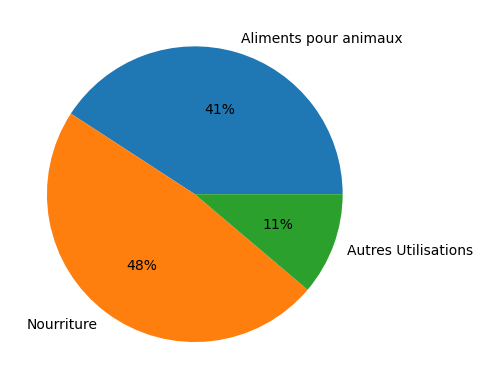

In [28]:
# Pie chart showing the breakdown between the 3 main categories.
labels = ["Aliments pour animaux","Nourriture","Autres Utilisations"]
data = df_cereale_sum[["Aliments pour animaux","Nourriture","Autres Utilisations"]].values
plt.pie(data, labels=labels, autopct='%1.0f%%', startangle = 0)
plt.show()

Around 50% of total cereal production is destined for human consumption.

In [29]:
df_cereale = df_cereale.groupby("Produit")[["Nourriture","Aliments pour animaux","Autres Utilisations","Disponibilité intérieure"]].sum()
df_cereale = df_cereale.sort_values(by='Disponibilité intérieure', ascending = False)
df_cereale["Ratio_H"] = (df_cereale["Nourriture"] / df_cereale["Disponibilité intérieure"]*100).astype(int)
df_cereale["Ratio_A"] = (df_cereale["Aliments pour animaux"] / df_cereale["Disponibilité intérieure"]*100).astype(int)
df_cereale

,Nourriture,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Ratio_H,Ratio_A
Produit,,,,,,
Maïs,125184.0,546116.0,189386.0,955799.0,13,57
Blé,457824.0,129668.0,22424.0,679498.0,67,19
Riz (Eq Blanchi),377286.0,33594.0,18464.0,475656.0,79,7
Orge,6794.0,92658.0,654.0,140439.0,4,65
Sorgho,24153.0,24808.0,2049.0,58237.0,41,42
Avoine,3903.0,16251.0,206.0,23407.0,16,69
Seigle,5502.0,8099.0,20.0,16567.0,33,48


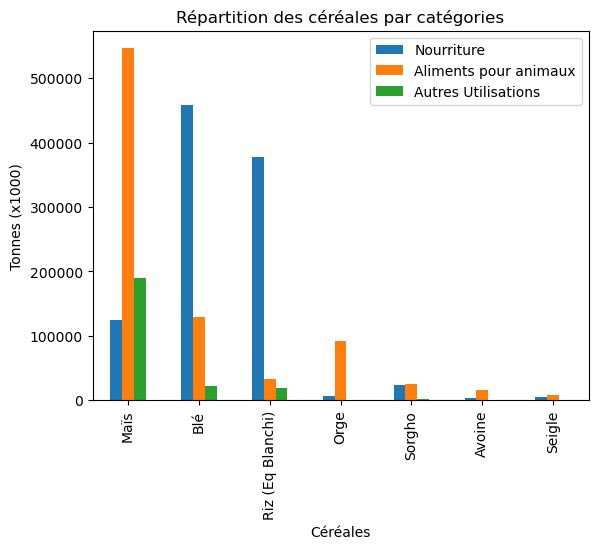

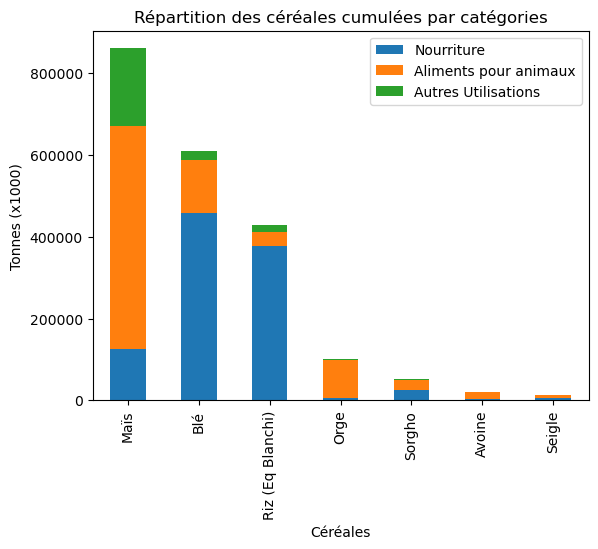

In [30]:
# Histogram - Cereals by category
df1 = df_cereale[["Nourriture","Aliments pour animaux","Autres Utilisations"]]
df1.plot.bar(stacked=False)
plt.xlabel("Céréales")
plt.ylabel("Tonnes (x1000)")
plt.title("Répartition des céréales par catégories")
plt.show()
# Histogram - Cereals by category Stacked
df1 = df_cereale[["Nourriture","Aliments pour animaux","Autres Utilisations"]]
df1.plot.bar(stacked=True)
plt.xlabel("Céréales")
plt.ylabel("Tonnes (x1000)")
plt.title("Répartition des céréales cumulées par catégories")
plt.show()

## **I.c) Thailand's use of cassava**

In [31]:
# Creation of the "thailande" dataframe
thailande = data_dispo.loc[(data_dispo['Zone'] == 'Thaïlande') & (data_dispo['Produit'] == 'Manioc')]
# Filter on selected columns
thailande = thailande[["Zone","Aliments pour animaux","Autres Utilisations","Disponibilité intérieure",
                       "Exportations - Quantité","Importations - Quantité","Nourriture","Production","Variation de stock"]]
thailande

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
13809,Thaïlande,1800.0,2081.0,6264.0,25214.0,1250.0,871.0,30228.0,0.0


In [32]:
# Calculation of Total Cassava Availability in Thailand
Dispo_totale_Manioc = thailande["Production"] + thailande["Importations - Quantité"] + thailande["Variation de stock"]
# Calculating the Export / Total Availability Ratio
thailande["Ratio_Exportation_Dispo_totale"] = thailande["Exportations - Quantité"] / Dispo_totale_Manioc * 100
# Calculating the Export / Production Ratio
thailande["Ratio_Exportation_Production"] = thailande["Exportations - Quantité"] / thailande["Production"] * 100
# Calculating the Import / Total Availability Ratio
thailande["Ratio_Importation_Dispo_totale"] = thailande["Importations - Quantité"] / Dispo_totale_Manioc * 100
# Display of 3 Ratios
thailande[["Ratio_Importation_Dispo_totale", "Ratio_Exportation_Dispo_totale", "Ratio_Exportation_Production"]].astype(int)

,Ratio_Importation_Dispo_totale,Ratio_Exportation_Dispo_totale,Ratio_Exportation_Production
13809,3,80,83


- Imports represent **3%** of the country's total availability.
- **80%** of Thailand's total cassava availability is destined for export.
- Exports represent **83%** of the country's cassava production.

In [33]:
# Thailand's undernourished population in 2013
thailande_sn = data_sn.loc[(data_sn['Zone'] == 'Thaïlande') & (data_sn['Année'] == 2013)]
# Thai population in 2013
thailande_pop = data_pop.loc[(data_pop['Zone'] == 'Thaïlande') & (data_pop['Année'] == 2013)] 
# Jointure entre thailande_sn et thailande_pop
thailande_sn_pop = pd.merge(thailande_sn, thailande_pop, how="inner", on="Zone")
thailande_sn_pop

,Zone,Année_x,Valeur_sn,Année_y,Valeur_pop
0,Thaïlande,2013,6200000.0,2013,68144518.0


In [34]:
# Calculation of the ratio of undernourished Thai population
ratio_sn_pop = round(thailande_sn_pop["Valeur_sn"] / thailande_sn_pop["Valeur_pop"]*100,2)
print(str(ratio_sn_pop[0]) + " % de la population Thaïlandaise en état de sous-nutriton.")

9.1 % de la population Thaïlandaise en état de sous-nutriton.


Thailand has almost **10%** of its population undernourished, but **83%** of cassava production is exported. Cassava is also used more to feed animals, at 1.8 million tonnes compared with 871,000 tonnes for human consumption. In other words, cassava is **2 times** more used for animal feed than human needs.

Cassava is a tuberous shrub grown primarily for its roots, but the wood can be used as fuel, the leaves and peelings for animal feed, and the stalks as food salt.

Cassava is used for human and animal nutrition, and in many industrial sectors is used in its starch form and for the production of ethanol.

## II-a) Proportion of undernourished people - 2017.

In [35]:
# Creation of dataframe ratio_sn_pop_tot with JOINT of data_sn and data_pop
ratio_sn_pop_tot = data_sn.loc[data_sn["Année"] == 2017].merge(data_pop.loc[data_pop["Année"] == 2017], how="inner", on="Zone")
# Calculation of the percentage of undernourished people
result = ratio_sn_pop_tot["Valeur_sn"].sum()*100 / ratio_sn_pop_tot["Valeur_pop"].sum()
print("{:.2f} % de la population mondiale en état de sous-nutrition".format(result))

7.10 % de la population mondiale en état de sous-nutrition


## II-b) Theoretical number of people who could be fed.

In [36]:
# Creation of a dataset aggregating food availability data (Kcal/person/day) by country
data_dispo_pop = data_dispo.groupby("Zone")[["Disponibilité alimentaire (Kcal/personne/jour)"]].sum()
population_2017 = data_pop.loc[data_pop["Année"] == 2017]
# Merge between data_dispo and data_pop files.
data_dispo_pop = pd.merge(data_dispo_pop, population_2017, how='inner', on='Zone')
# Rename columns
data_dispo_pop.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)" : "Disponibilité alimentaire (Kcal/personne/jour/pays)"},inplace=True)
# Display the DataFrame
data_dispo_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour/pays),Année,Valeur_pop
0,Afghanistan,2087.0,2017,36296113.0
1,Afrique du Sud,3020.0,2017,57009756.0
2,Albanie,3188.0,2017,2884169.0
3,Algérie,3293.0,2017,41389189.0
4,Allemagne,3503.0,2017,82658409.0


For an adult man, the recommended energy intake is, on average, 2,400 to 2,600 calories a day, depending on activity. For an adult woman, it's 1,800 to 2,200 calories. 

For the rest of the calculations, we'll assume that **daily intake = 2,500 Kcal/day/person**.

In [37]:
# Food availability in relation to the population of each country
data_dispo_pop["Kcal/jour/pays"] = data_dispo_pop["Disponibilité alimentaire (Kcal/personne/jour/pays)"] * data_dispo_pop["Valeur_pop"]
# Calculation of the global quantity of calories available in relation to daily intake
qte_monde_kcal = data_dispo_pop["Kcal/jour/pays"].sum()/2500
qte_monde_kcal

8367593850.9324

In [38]:
pop_tot = population_2017["Valeur_pop"].sum()
pop_tot

7548134111.0

In [39]:
# Calculation of the theoretical number of people who could be fed
nb_th_hab_nourrie = round(qte_monde_kcal/pop_tot,3)
print("La nourriture produite à travers le monde est capable de nourrir {:.2f} fois la population mondiale.".format(nb_th_hab_nourrie))

La nourriture produite à travers le monde est capable de nourrir 1.11 fois la population mondiale.


## II-C) Potential number of people who could be fed solely on plants.

In [40]:
# Filter on "Origin" column of "data_dispo" dataset and on year 2017 of data_pop dataset
data_dispo_veg = data_dispo.loc[data_dispo["Origine"] == "vegetale"]
population_2017 = data_pop.loc[data_pop["Année"] == 2017]
# Creation of a dataset aggregating food availability data (Kcal/person/day) by country
data_dispo_pop_vegetaux = data_dispo_veg.groupby(["Zone"])[["Disponibilité alimentaire (Kcal/personne/jour)"]].sum()
# Merge between data_dispo and data_pop files
data_dispo_pop = pd.merge(data_dispo_pop_vegetaux, population_2017, how='inner', on='Zone')
# Rename columns
data_dispo_pop.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)" : "Disponibilité alimentaire (Kcal/personne/jour/pays)"},inplace=True)
# Display the DataFrame
data_dispo_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour/pays),Année,Valeur_pop
0,Afghanistan,1871.0,2017,36296113.0
1,Afrique du Sud,2533.0,2017,57009756.0
2,Albanie,2203.0,2017,2884169.0
3,Algérie,2915.0,2017,41389189.0
4,Allemagne,2461.0,2017,82658409.0


In [41]:
# Food availability in relation to the population of each country
data_dispo_pop["Kcal/jour/pays"] = data_dispo_pop["Disponibilité alimentaire (Kcal/personne/jour/pays)"] * data_dispo_pop["Valeur_pop"]
# Calculation of the global quantity of calories available in relation to daily intake (Kcal/day/country)
qte_monde_kcal_vegetaux = data_dispo_pop["Kcal/jour/pays"].sum()/2500
qte_monde_kcal_vegetaux
# Calculation of the theoretical number of people who could be fed solely with food from plant sources
nb_th_hab_nourrie_vegetaux = round(qte_monde_kcal_vegetaux/pop_tot*100,3)
nb_th_hab_nourrie_vegetaux
print(str(round(nb_th_hab_nourrie_vegetaux,3)) + " % de la population mondiale peut-être nourrie grâce à l'alimentation d'origine végétale.")

91.47 % de la population mondiale peut-être nourrie grâce à l'alimentation d'origine végétale.


 ## II-d) Use of domestic availability, in particular :
 - the share allocated to animal feed,
 - the ones lost in the process
     - These are quantities lost during processing, storage and transport. Losses before and during harvest are not taken into account. 
 - the one actually used for human consumption.

In [42]:
# Calculation of total domestic availability in thousands of tonnes
Qte_tot_Dispo_int = data_dispo["Disponibilité intérieure"].sum()
# Calculation of total quantity in thousands of tons - Animal feed
Qte_tot_Alim_Animaux = data_dispo["Aliments pour animaux"].sum()
Ratio_Alim_Animaux = Qte_tot_Alim_Animaux / Qte_tot_Dispo_int*100
# Calculation of the total quantity in thousands of tons of Losses 
Qte_tot_Pertes = data_dispo["Pertes"].sum()
Ratio_Pertes = Qte_tot_Pertes / Qte_tot_Dispo_int*100
# Calculation of the total quantity in thousands of tons of Food for Human Beings
Qte_tot_Alim_Humain = data_dispo["Nourriture"].sum()
Ratio_Alim_Hu = Qte_tot_Alim_Humain / Qte_tot_Dispo_int*100

In [43]:
print("L'alimentation animale représente {:.2f} %,".format(Ratio_Alim_Animaux), 
      "la nourriture pour les êtres humains représente {:.2f} %,".format(Ratio_Alim_Hu),
      "les pertes représente {:.2f} %".format(Ratio_Pertes))


L'alimentation animale représente 13.24 %, la nourriture pour les êtres humains représente 49.51 %, les pertes représente 4.61 %


## III-a) Countries with the highest proportion of undernourished people in 2017.

In [44]:
# Filter on the year 2017 for both datasets
data_sn_2017 = data_sn.loc[data_sn["Année"] == 2017]
data_pop_2017 = data_pop.loc[data_pop["Année"] == 2017]
# Merge
data_sn_pop_2017 = pd.merge(data_sn_2017, data_pop_2017, how="inner", on="Zone")
# Create "Ratio_sn_pop" column
data_sn_pop_2017["Ratio_sn_pop"] = round(data_sn_pop_2017["Valeur_sn"] / data_sn_pop_2017["Valeur_pop"]*100,2)
# Filter the "Ratio_sn_pop by descending order" column
data_sn_pop_2017.sort_values("Ratio_sn_pop", ascending=False).head(10)

,Zone,Année_x,Valeur_sn,Année_y,Valeur_pop,Ratio_sn_pop
78,Haïti,2017,5300000.0,2017,10982366.0,48.26
157,République populaire démocratique de Corée,2017,12000000.0,2017,25429825.0,47.19
108,Madagascar,2017,10500000.0,2017,25570512.0,41.06
103,Libéria,2017,1800000.0,2017,4702226.0,38.28
100,Lesotho,2017,800000.0,2017,2091534.0,38.25
183,Tchad,2017,5700000.0,2017,15016753.0,37.96
161,Rwanda,2017,4200000.0,2017,11980961.0,35.06
121,Mozambique,2017,9400000.0,2017,28649018.0,32.81
186,Timor-Leste,2017,400000.0,2017,1243258.0,32.17
0,Afghanistan,2017,10500000.0,2017,36296113.0,28.93


In [45]:
# Filter on countries with more than 20% of their population undernourished
df = data_sn_pop_2017.loc[data_sn_pop_2017["Ratio_sn_pop"] > 20, "Zone"]
# Create a list of countries
liste_pays_sous_alim = df.tolist()
liste_pays_sous_alim

['Afghanistan',
 'Botswana',
 'Congo',
 "Côte d'Ivoire",
 'Haïti',
 'Iraq',
 'Kenya',
 'Lesotho',
 'Libéria',
 'Madagascar',
 'Mozambique',
 'République populaire démocratique de Corée',
 'République-Unie de Tanzanie',
 'Rwanda',
 'Sierra Leone',
 'Tchad',
 'Timor-Leste',
 'Togo',
 'Venezuela (République bolivarienne du)']

In [46]:
print(str(len(liste_pays_sous_alim)) + " pays ont un taux de sous-nutrition > à 20 %")

19 pays ont un taux de sous-nutrition > à 20 %


## III-b) Countries that received most aid since 2013

### Link the thousands of tons of food aid received since 2013 and the population per country/capita.

In [47]:
# Rename Taiwan, Macao, Hong-Kong to China in dataset data_pop_modif created from data_pop
chine = {"Chine - RAS de Hong-Kong" : "Chine continentale",
         "Chine - RAS de Macao" : "Chine continentale",
         "Taïwan - province de Chine" : "Chine continentale"}
data_pop_modif = data_pop.copy()
data_pop_modif["Zone"] = data_pop_modif["Zone"].replace(chine)

In [48]:
# Merge on Zone and Year columns
data_aa_pop = pd.merge(data_aa,data_pop_modif,how="inner",on=["Zone", "Année"])
data_aa_pop.head()

,Zone,Année,Produit,Valeur_aa_kg,Valeur_pop
0,Afghanistan,2013,Autres non-céréales,682000,32269589.0
1,Afghanistan,2013,Blé et Farin,39224000,32269589.0
2,Afghanistan,2013,Céréales,40504000,32269589.0
3,Afghanistan,2013,"Fruits secs, total",85000,32269589.0
4,Afghanistan,2013,Huiles végétales,11087000,32269589.0


In [49]:
# Group by Zone and Year
data_aa_pop_pays = data_aa_pop.groupby(["Zone", "Année"])[["Valeur_aa_kg", "Valeur_pop"]].sum()
# Addition of the column aide_alim_kg/person, conversion of thousands of tons into kg
data_aa_pop_pays["aide_alim_kg/personne"] = round(data_aa_pop_pays["Valeur_aa_kg"] / data_aa_pop_pays["Valeur_pop"],2)
# To display "Zone" as a column
data_aa_pop_pays = data_aa_pop_pays.reset_index()
# Group aide_alim_kg_personne by country
data_aa_pop_pays = data_aa_pop_pays.groupby("Zone")[["Valeur_aa_kg","aide_alim_kg/personne"]].sum().sort_values("Valeur_aa_kg", ascending=False)
# Results
data_aa_pop_pays.head(10)

,Valeur_aa_kg,aide_alim_kg/personne
Zone,,
République arabe syrienne,1858943000,10.09
Éthiopie,1381294000,1.26
Yémen,1206484000,4.74
Soudan du Sud,695248000,9.37
Soudan,669784000,2.11
Kenya,552836000,1.31
Bangladesh,348188000,0.27
Somalie,292678000,2.41
République démocratique du Congo,288502000,0.47


In [50]:
# Filter on countries that received more than 500,000,000 kg of food aid
result_pays = data_aa_pop_pays.loc[data_aa_pop_pays["Valeur_aa_kg"] > 500000000, ["Valeur_aa_kg"]].sort_values("Valeur_aa_kg", ascending=False)
result_pays

,Valeur_aa_kg
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000


The 6 countries that have received more than 500,000 tons of food aid since 2013 are: 
- Syrian Arab Republic
- Ethiopia
- Yemen
- South Sudan
- Sudan
- Kenya

In [51]:
print("{:.0f} pays ont reçus plus de 500.000 tonnes d'aide alimentaire depuis 2013.".format(len(result_pays)))

6 pays ont reçus plus de 500.000 tonnes d'aide alimentaire depuis 2013.


In [52]:
# Filter on countries that received more than 4kg/person of food aid
result_pays_hab = data_aa_pop_pays.loc[data_aa_pop_pays["aide_alim_kg/personne"] > 4].sort_values("aide_alim_kg/personne", ascending=False)
result_pays_hab

,Valeur_aa_kg,aide_alim_kg/personne
Zone,,
République arabe syrienne,1858943000,10.09
Soudan du Sud,695248000,9.37
Palestine,169684000,5.91
Comores,7806000,5.26
Yémen,1206484000,4.74
Djibouti,41296000,4.68


The 6 countries that have received the most food aid per **people** since 2013 are : 
- Syrian Arab Republic
- South Sudan
- Palestine
- Comoros
- Yemen
- Djibouti

In [53]:
print("{:.0f} pays ont reçus plus de 4kg d'aide alimentaire par habitant depuis 2013.".format(len(result_pays_hab)))

6 pays ont reçus plus de 4kg d'aide alimentaire par habitant depuis 2013.


## III-c) Countries with the highest/lowest food availability/capita

In [54]:
# Creation of a dataset aggregating data Food availability in quantity (kg/person/year)
data_dispo_pop_hab = data_dispo.groupby("Zone")[["Disponibilité alimentaire (Kcal/personne/jour)"]].sum()
# To recognizes the "Zone" column in the Notebook suite
data_dispo_pop_hab = data_dispo_pop_hab.reset_index()
# Display
data_dispo_pop_hab.sort_values("Disponibilité alimentaire (Kcal/personne/jour)").head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
127,République centrafricaine,1879.0
166,Zambie,1924.0
90,Madagascar,2056.0
0,Afghanistan,2087.0
64,Haïti,2089.0


In [55]:
# Which countries are rich in food availability?
pays_riches = data_dispo_pop_hab.loc[data_dispo_pop_hab["Disponibilité alimentaire (Kcal/personne/jour)"] > 2500, 
                                     ["Zone", 
                                      "Disponibilité alimentaire (Kcal/personne/jour)"]].sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)

pays_riches.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
73,Israël,3610.0
71,Irlande,3602.0
74,Italie,3578.0
88,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


In [56]:
print("{:.0f} pays possède plus de 2500 Kcal de nourriture par habitant pour 2013.".format(len(pays_riches)))

132 pays possède plus de 2500 Kcal de nourriture par habitant pour 2013.


In [57]:
# Which countries are poor in food availability?
pays_pauvres = data_dispo_pop_hab.loc[data_dispo_pop_hab["Disponibilité alimentaire (Kcal/personne/jour)"] < 2500, 
                                     ["Zone", 
                                      "Disponibilité alimentaire (Kcal/personne/jour)"]].sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)

pays_pauvres.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
134,Saint-Kitts-et-Nevis,2491.0
5,Angola,2474.0
29,Cambodge,2473.0
131,République démocratique populaire lao,2455.0
67,Inde,2454.0
14,Bangladesh,2453.0
148,Sénégal,2453.0
155,Togo,2448.0
57,Grenade,2442.0
115,Pakistan,2438.0


In [58]:
print("{:.0f} pays possède moins de 2500 Kcal de nourriture par habitant pour 2013.".format(len(pays_pauvres)))

42 pays possède moins de 2500 Kcal de nourriture par habitant pour 2013.


#### ---------------------------------------------------------------------------------------

# Geospatial mapping

In [59]:
import geopandas as gpd
import matplotlib
import plotly.express as px

In [60]:
data_gps = pd.read_csv("pays_capitale_latitude_longitude.csv", sep = ";")
data_gps.head()

,Zone,City,latitude,longitude,Country,Continent
0,Afghanistan,Kabul,34.5328,69.1658,Afghanistan,Asia
1,Afrique du Sud,Cape Town,-33.9250,18.4250,South Africa,Africa
2,Albanie,Tirana,41.3300,19.8200,Albania,Europe
3,Algérie,Algiers,36.7764,3.0586,Algeria,Africa
4,Allemagne,Berlin,52.5167,13.3833,Germany,Europe


In [61]:
# Converting latitudes and longitudes into Cartesian coordinates (x,y)
data_gps = gpd.GeoDataFrame(data_gps, geometry = gpd.points_from_xy(data_gps.latitude, data_gps.longitude))
data_gps.head()

,Zone,City,latitude,longitude,Country,Continent,geometry
0,Afghanistan,Kabul,34.5328,69.1658,Afghanistan,Asia,POINT (34.53280 69.16580)
1,Afrique du Sud,Cape Town,-33.9250,18.4250,South Africa,Africa,POINT (-33.92500 18.42500)
2,Albanie,Tirana,41.3300,19.8200,Albania,Europe,POINT (41.33000 19.82000)
3,Algérie,Algiers,36.7764,3.0586,Algeria,Africa,POINT (36.77640 3.05860)
4,Allemagne,Berlin,52.5167,13.3833,Germany,Europe,POINT (52.51670 13.38330)


In [62]:
# Merge between rich countries and data_gps
top_pays_riches_map = pd.merge(data_gps[["Zone", "geometry", "Continent", "Country"]],
                           pays_riches[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]], how="inner", on="Zone")
top_pays_riches_map.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
top_pays_riches_map.head()

,Zone,geometry,Continent,Country,Disponibilité alimentaire (Kcal/personne/jour)
0,Afrique du Sud,POINT (-33.92500 18.42500),Africa,South Africa,3020.0
1,Albanie,POINT (41.33000 19.82000),Europe,Albania,3188.0
2,Algérie,POINT (36.77640 3.05860),Africa,Algeria,3293.0
3,Allemagne,POINT (52.51670 13.38330),Europe,Germany,3503.0
4,Arabie saoudite,POINT (24.65000 46.71000),Asia,Saudi Arabia,3255.0


In [63]:
# Merge between poor countries and data_gps
top_pays_pauvres_map = pd.merge(data_gps[["Zone", "geometry", "Continent", "Country"]], 
                            pays_pauvres[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]], how="inner", on="Zone")
top_pays_pauvres_map.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
top_pays_pauvres_map.head()

,Zone,geometry,Continent,Country,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,POINT (34.533 69.166),Asia,Afghanistan,2087.0
1,Angola,POINT (-8.838 13.234),Africa,Angola,2474.0
2,Antigua-et-Barbuda,POINT (17.121 -61.845),North America,Antigua And Barbuda,2416.0
3,Bangladesh,POINT (23.729 90.394),Asia,Bangladesh,2453.0
4,Bolivie (État plurinational de),POINT (-16.494 -68.147),South America,Bolivia,2250.0


<AxesSubplot: >

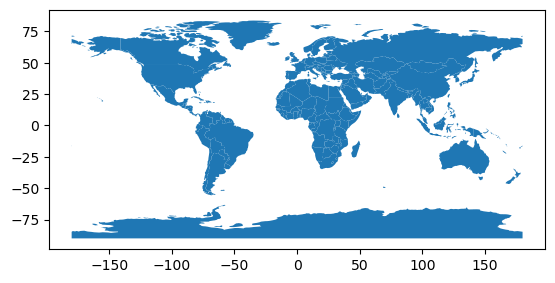

In [64]:
# Get the built-in dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot()

In [65]:
# Creation of the Rich Country Map
f = px.choropleth(top_pays_riches_map, 
                locationmode = "country names",
                locations = top_pays_riches_map["Country"],
                scope = "world",
                color = top_pays_riches_map["Country"],
                title = "Countries with high food availability")

f.update_layout(title_x=0.5, title_font=dict(color="blue"))
f.show()

# Creation of the Poor Country Map
f = px.choropleth(top_pays_pauvres_map, 
                locationmode = "country names",
                locations = top_pays_pauvres_map["Country"],
                scope = "world",
                color = top_pays_pauvres_map["Country"],
                title = "Countries with low food availability")

f.update_layout(title_x=0.5, title_font=dict(color="red"))
f.show()

In [66]:
# Merge between countries and data_gps
pays_map = pd.merge(data_gps[["Zone", "geometry", "Continent", "Country"]],
                           data_dispo_pop_hab[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]], how="inner", on="Zone")
pays_map.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
# Rename the column to display a shorter legend
pays_map.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)" : "Kcal/personne/jour"}, inplace=True)
pays_map.head()

,Zone,geometry,Continent,Country,Kcal/personne/jour
0,Afghanistan,POINT (34.53280 69.16580),Asia,Afghanistan,2087.0
1,Afrique du Sud,POINT (-33.92500 18.42500),Africa,South Africa,3020.0
2,Albanie,POINT (41.33000 19.82000),Europe,Albania,3188.0
3,Algérie,POINT (36.77640 3.05860),Africa,Algeria,3293.0
4,Allemagne,POINT (52.51670 13.38330),Europe,Germany,3503.0


In [67]:
# Creation of a Country Map based on food availability
f = px.choropleth(pays_map, 
                locationmode = "country names",
                locations = pays_map["Country"],
                scope = "world",
                color = pays_map["Kcal/personne/jour"],
                title = "Global Food availability in Kcal/people/day",
                color_continuous_scale=px.colors.sequential.Plasma)

f.update_layout(title_x=0.5, title_font=dict(color="blue"), width = 980, height = 700)
f.show()